In [1]:
import pandas as pd
import math
import numpy as np
import datetime as dt
from mpl_finance import candlestick_ohlc
from mpl_finance import candlestick2_ohlc
import yfinance as yf
#import investpy as ipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import talib as TA
from mpl_finance import candlestick2_ohlc
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from datetime import datetime
pd.options.mode.chained_assignment = None
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
my_interval = "1d"
# df_2800=yf.download("2800.HK","2019-01-01",interval=my_interval)
# df_7500=yf.download("7500.HK","2019-01-01",interval=my_interval)

df_2800=yf.download("2800.HK","2019-01-01")
df_7500=yf.download("7500.HK","2019-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
df_2800["Date"]=df_2800.index
df_7500["Date"]=df_7500.index

In [4]:
df_2800=df_2800[["Date","Open","High","Low","Close","Volume"]].copy()
df_7500=df_7500[["Open","High","Low","Close","Volume"]].copy()

In [5]:
df_2800["Date1"]=df_2800["Date"].dt.date
df_2800["Date1"]=pd.to_datetime(df_2800["Date1"],format="%Y-%m-%d")
df_2800["Year"]=df_2800["Date"].dt.year
df_2800["Week"]=df_2800["Date"].dt.week
df_2800["Month"]=df_2800["Date"].dt.month
df_2800["hour"]=df_2800["Date"].dt.hour
df_2800["Gap"]=df_2800["Open"]-df_2800["Close"].shift()
df_2800["Volatility"]=df_2800["High"]-df_2800["Low"]
df_2800["Return"]=df_2800["Close"]-df_2800["Close"].shift()
df_2800["EMA9"]=TA.EMA(df_2800["Close"],9)
df_2800["EMA19"]=TA.EMA(df_2800["Close"],19)
df_2800["EMA50"]=TA.EMA(df_2800["Close"],50)
df_2800["ADX"]=TA.ADX(df_2800["High"],df_2800["Low"],df_2800["Close"])
df_2800["DMI+"]=TA.PLUS_DM(df_2800["High"],df_2800["Low"])
df_2800["DMI-"]=TA.MINUS_DM(df_2800["High"],df_2800["Low"])
df_2800["RSI9"]=TA.RSI(df_2800["Close"],9)
df_2800["macd"],df_2800["macdsignal"],df_2800["macdhist"]=TA.MACD(df_2800["Close"],fastperiod=5, slowperiod=34, signalperiod=5)

In [6]:
df_7500.columns = ["Open_7500","High_7500","Low_7500","Close_7500","Volume_7500"]

In [7]:
df_2800_7500=pd.concat([df_2800,df_7500],axis=1)

In [8]:
df_2800_7500.loc["2019-06-01":].head()

,Date,Open,High,Low,Close,Volume,Date1,Year,Week,Month,hour,Gap,Volatility,Return,EMA9,EMA19,EMA50,ADX,DMI+,DMI-,RSI9,macd,macdsignal,macdhist,Open_7500,High_7500,Low_7500,Close_7500,Volume_7500
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-03,2019-06-03,27.200001,27.400000,27.150000,27.299999,95488842,2019-06-03,2019,23,6,0,-0.150000,0.250000,-0.050001,27.653962,28.109307,28.648341,41.075315,0.461498,1.711532,20.010965,-1.046151,-1.023578,-0.022573,7.50,7.50,7.34,7.41,37711900.0
2019-06-04,2019-06-04,27.400000,27.400000,27.100000,27.200001,91913124,2019-06-04,2019,23,6,0,0.100000,0.299999,-0.099998,27.563170,28.018376,28.591544,42.323648,0.428534,1.639279,18.483426,-1.063695,-1.036950,-0.026745,7.37,7.51,7.36,7.46,21007500.0
2019-06-05,2019-06-05,27.500000,27.600000,27.250000,27.400000,102181856,2019-06-05,2019,23,6,0,0.299999,0.350000,0.199999,27.530536,27.956539,28.544817,42.414457,0.597925,1.522187,30.432102,-0.999224,-1.024375,0.025151,7.33,7.43,7.26,7.37,33081800.0
2019-06-06,2019-06-06,27.350000,27.450001,27.299999,27.400000,62418590,2019-06-06,2019,23,6,0,-0.049999,0.150002,0.000000,27.504429,27.900885,28.499922,42.498780,0.555216,1.413460,30.432102,-0.939667,-0.996139,0.056472,7.37,7.41,7.32,7.34,14450300.0
2019-06-10,2019-06-10,27.650000,28.100000,27.650000,28.049999,57213749,2019-06-10,2019,24,6,0,0.250000,0.450001,0.650000,27.613543,27.915796,28.482278,39.886702,1.165557,1.312498,56.599450,-0.704809,-0.899029,0.194220,7.26,7.26,6.96,6.97,42893600.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


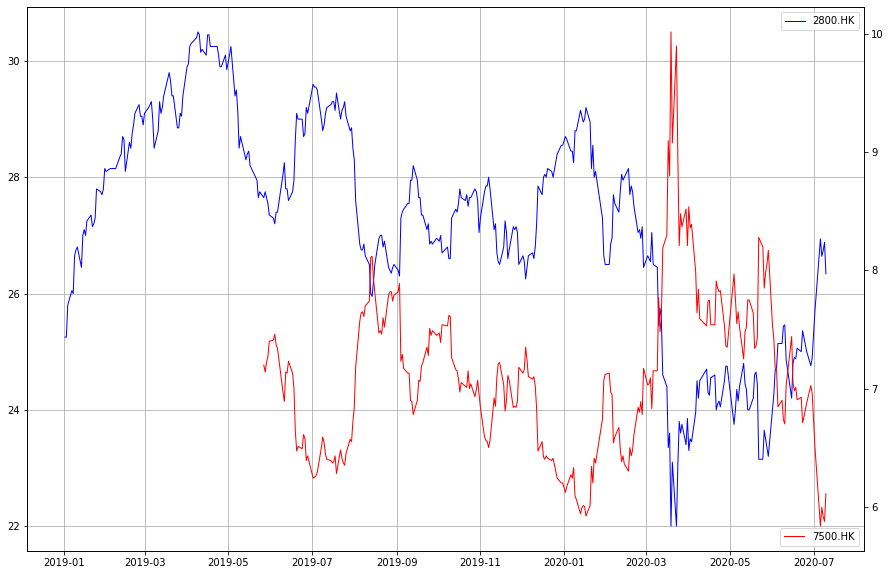

In [9]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(df_2800_7500["Date"],df_2800_7500["Close"],color="blue",label="2800.HK",linewidth=1)
ax1=ax.twinx()
ax1.plot(df_2800_7500["Date"],df_2800_7500["Close_7500"],color="red",label="7500.HK",linewidth=1)
ax.grid(True)
ax.legend()
ax1.legend(loc="lower right")
plt.show()

In [10]:
def cross_over_up(df,TA1,TA2):
    TA1_TA2=np.where((df[TA1]-df[TA2])>0,1,0)
    Enter1=np.pad(np.where(np.diff(TA1_TA2)==1,1,0),(1,0),"constant")
    Enter=pd.Series(Enter1,index=list(df.index))
    return(Enter)
def cross_over_down(df,TA1,TA2):
    TA1_TA2=np.where((df[TA1]-df[TA2])<0,1,0)
    Enter1=np.pad(np.where(np.diff(TA1_TA2)==1,1,0),(1,0),"constant")
    Enter=pd.Series(Enter1,index=list(df.index))
    return(Enter)

In [11]:
MACD_crossoverup=cross_over_up(df_2800,"macd","macdsignal")
MACD_crossoverdown=cross_over_down(df_2800,"macd","macdsignal")

In [12]:
df_2800["MACD_crossoverup"]=MACD_crossoverup
df_2800["MACD_crossoverdown"]=MACD_crossoverdown

In [13]:
df_2800.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374 entries, 2019-01-02 to 2020-07-10
Data columns (total 26 columns):
Date                  374 non-null datetime64[ns]
Open                  374 non-null float64
High                  374 non-null float64
Low                   374 non-null float64
Close                 374 non-null float64
Volume                374 non-null int64
Date1                 374 non-null datetime64[ns]
Year                  374 non-null int64
Week                  374 non-null int64
Month                 374 non-null int64
hour                  374 non-null int64
Gap                   373 non-null float64
Volatility            374 non-null float64
Return                373 non-null float64
EMA9                  366 non-null float64
EMA19                 356 non-null float64
EMA50                 325 non-null float64
ADX                   347 non-null float64
DMI+                  361 non-null float64
DMI-                  361 non-null float64
RSI9        

In [23]:
def my_backtest(df,amount,stoploss):
    # df -> original dataframe
    # amount -> profit target
    # stoploss -> the value below the enter price
    
    # flag to indicate if the trigger long signal appeared. If yes flag will be changed from zero to one
    flag_long=0
    
    
    #it is the max value of the price of the double peak/double bottom pattern
    price1=np.nan
    #it is the min value of the price of the double peak/double bottom pattern
    price0=np.nan
    # It indicates the price of enter after the trigger signal happened. 
    # For double bottom, enter only happened when the close price is higher than price1 as shown below.
    # For double peak, enter only happened when the close price is lower than price0 as shown below.
    price2=np.nan
    # The exit price of the trade
    price3=np.nan
    # To set the profit target
    Amount=amount
    # The stop loss limit used for the backtesting. 
    # It indicates the value below the enter price (price2)
    Stoploss=stoploss
    # It indicates the date of the trigger of the signal
    date_trigger=np.nan

    # Those are the lists used to log all the entries for the open date,close date,open price, close price of the trade
    trade_type=[]
    trade_triggerdate=[]
    trade_OpenDate=[]
    trade_CloseDate=[]
    trade_OpenPrice=[]
    trade_ClosePrice=[]
    trade_ExitReason=[]
    
    #The trading logic for double bottom
    for i in range(1,len(df)-1):    

        if ((df["MACD_crossoverup"].iloc[i]==1) & (flag_long==0)):           

            price1=max(df["High"].iloc[i],df["High"].iloc[i-1])
            price0=min(df["Low"].iloc[i],df["Low"].iloc[i-1])          
            
            date_trigger=df["Date"].iloc[i]
            flag_long=1
            price2=df["Open"].iloc[i+1] # Sencond bar open price (entering price)
            trade_type.append("MACD_crossoverup")
            trade_triggerdate.append(date_trigger)
            trade_OpenDate.append(df["Date"].iloc[i])
            trade_OpenPrice.append(price2)
            continue

           
            
        if (flag_long==1):           
            # Low, limited order
            if ((df["Low"].iloc[i]<=price0-Stoploss) | 
                 (df["High"].iloc[i]>=price1+Amount) | (df["MACD_crossoverdown"].iloc[i]==1)):    

                flag_long=0
                date_trigger=np.nan

                # Append the date and the price of the exit
                trade_CloseDate.append(df["Date"].iloc[i])
                #trade_ClosePrice.append(price3)
                # To define the exit reason based on the conditions.
                if (df["Low"].iloc[i]<=price0-Stoploss):
                    trade_ExitReason.append("Stop Loss")
                    price3=price0-Stoploss
                    trade_ClosePrice.append(price3)
                elif (df["High"].iloc[i]>=price1+Amount):
                    trade_ExitReason.append("Profit Target")
                    price3=price2+Amount
                    trade_ClosePrice.append(price3)
                elif (df["MACD_crossoverdown"].iloc[i]==1):
                    trade_ExitReason.append("MACD_crossoverdown")

                    price3=df["Open"].iloc[i+1]
                    trade_ClosePrice.append(price3)

                        
                else:
                    trade_ExitReason.append(np.nan)           

            
            continue
            
    df_trade=pd.DataFrame({"Trade_Type":trade_type,"TriggerDate":trade_triggerdate,"OpenDate":trade_OpenDate,"OpenPrice":
                               trade_OpenPrice,"CloseDate":trade_CloseDate,"ClosePrice":trade_ClosePrice,"ExitReason":trade_ExitReason})
    df_trade["Return"]=np.where(df_trade["Trade_Type"]=="MACD_crossoverup",df_trade["ClosePrice"]-df_trade["OpenPrice"],
                               df_trade["OpenPrice"]-df_trade["ClosePrice"])
    return(df_trade)
    

In [24]:
df_2800["High"].iloc[2-1]

25.450000762939453

In [25]:
df_trade1=my_backtest(df_2800,25,0)
# df_trade1.index=df_trade1["OpenDate"]
# df_trade1["Amount"]=df_trade1["Return"]*500 #per lot
# df_trade1

ValueError: arrays must all be same length